In [1]:
#!pip install -q geopandas

In [1]:
import geopandas as gpd
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
database_path = "/home/ubuntu/base_dados/geopandas/lim_unidade_federacao_a.shp"

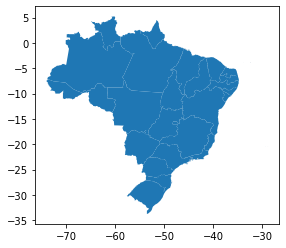

In [3]:
map_df = gpd.read_file(database_path)
map_df.plot()

In [4]:
map_df.head()

,nome,nomeabrev,geometriaa,sigla,geocodigo,id_produto,id_element,geometry
0,Bahia,Bahia,Não,BA,29,250014.0,None,"MULTIPOLYGON (((-38.71080 -17.96966, -38.70848..."
1,Pará,None,None,PA,15,NaN,None,"MULTIPOLYGON (((-46.45928 -0.90961, -46.45936 ..."
2,Rio de Janeiro,None,None,RJ,33,250000.0,None,"MULTIPOLYGON (((-43.55929 -23.08050, -43.55938..."
3,São Paulo,None,None,SP,35,250000.0,None,"MULTIPOLYGON (((-45.13777 -23.79018, -45.13777..."
4,Espírito Santo,None,None,ES,32,250000.0,None,"MULTIPOLYGON (((-28.85365 -20.47547, -28.85372..."


In [5]:
df_casos_ano_uf = "/home/ubuntu/Geracao_profiling/base_casos_ano_uf.csv"
df = pd.read_csv(df_casos_ano_uf)
df.shape

(216, 5)

In [6]:
df.head()

,ANO,UF,DENGUE,CHIKUNGUNYA,OUTRAS_DOENCAS
0,2013,PB,6061,0,3455
1,2013,PE,3211,0,7890
2,2013,RN,7345,0,4281
3,2013,AC,766,0,2459
4,2013,RO,3419,0,2746


In [11]:
def fmt(x, pos):
    
    casos_bloco = vmax / quant_blocos
    meio_bloco = int(casos_bloco / 2)
    
    msg = ""
    if (pos == 0):
        msg = f'Up to {(x+meio_bloco):,} cases'
    else:
        msg = f'{(x-meio_bloco):,} to {(x+meio_bloco):,} cases'
    msg = msg.replace(',','.')
    return msg

def plot_grafico_brasil(doenca='DENGUE', ano=2015, quant_blocos=8, cor='Blues', vmax=420000, path_save_folder=None):
    '''
    Descrição:
        PLota o grafico de calor de casos com base na doenca e no ano
    Entrada:
        doenca: string -> Default: DENGUE
            doenca a ser plotado. Default: DENGUE
        ano: int -> Default: 2015
            ano a ser plotado.
        quant_blocos: int -> Default: 8
            Quantidade de blocos que deseja que seja feita a legenda e, consequentemente, 
            a forma como o mapa de calor sera distribuído no mapa.
        cor: string -> Default: Blues
            Cor para ser utilziado no mapa de calor
        vmax: int -> Default: 420000
            A quantidade máxima de casos e quebrado, por isso coloque isso para definir 
            uma quantidade maior redonda
        save: bool -> Default: True
            Escolher se vai salvar ou nao a imagem, a mesma sera salva com o nome do 
            arquivo sendo a Geracao_profiling/{doenca}/{doenca}{ano}.jpg
        path: string -> Default: Geracao_profiling
            Pasta onde sera salvo a imagem, caso save=True. O arquivo sera salvo
            no caminho {path}/{doenca}/{doenca}{ano}.jpg
    '''
    
    vmin=0

    casos_bloco = vmax / quant_blocos
    meio_bloco = casos_bloco / 2

    df_ano = df[(df.ANO == ano)]
    merged = map_df.set_index('sigla').join(df_ano.set_index('UF'))
    merged.head()

    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.axis('off')
    # ax.set_title(f'{ano}', fontdict={'fontsize': '25', 'fontweight' : '3'})


    # Create colorbar as a legend
    # add the colorbar to the figure
    sm = plt.cm.ScalarMappable(
        cmap=plt.cm.get_cmap(cor, quant_blocos),
        norm=plt.Normalize(vmin=vmin, vmax=vmax)
    )
    cbar = fig.colorbar(
        sm,
        ticks=range(int(meio_bloco), vmax, int(casos_bloco)),
        spacing='proportional',
        format=ticker.FuncFormatter(fmt),
        aspect = 3,
    )
    cbar.ax.tick_params(labelsize=20)
    
    merged.plot(
        column=doenca,
        cmap=plt.cm.get_cmap(cor, quant_blocos),
        linewidth=0.8,
        ax=ax,
        edgecolor='0.8',
        vmin=vmin,
        vmax=vmax
    )
    
    if (path_save_folder):
        fig.savefig(f'{path_save_folder}/{doenca}/{doenca}{ano}.jpg', dpi=300, bbox_inches='tight')

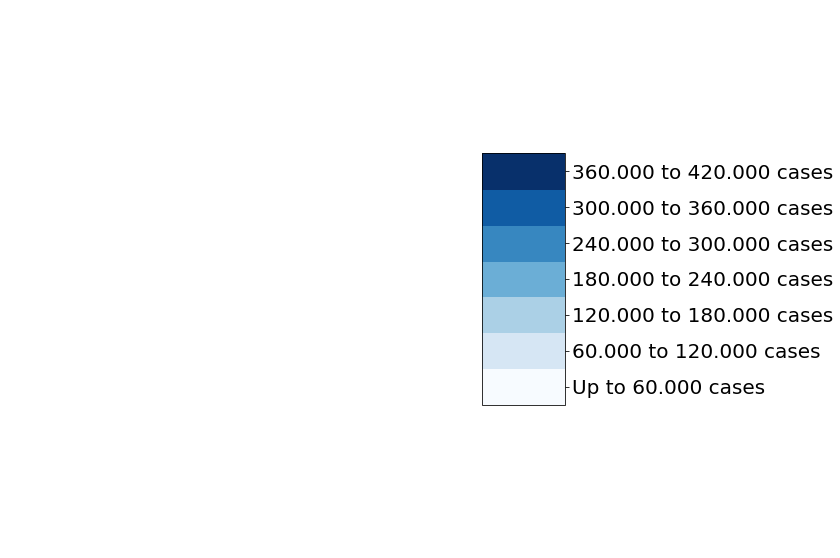

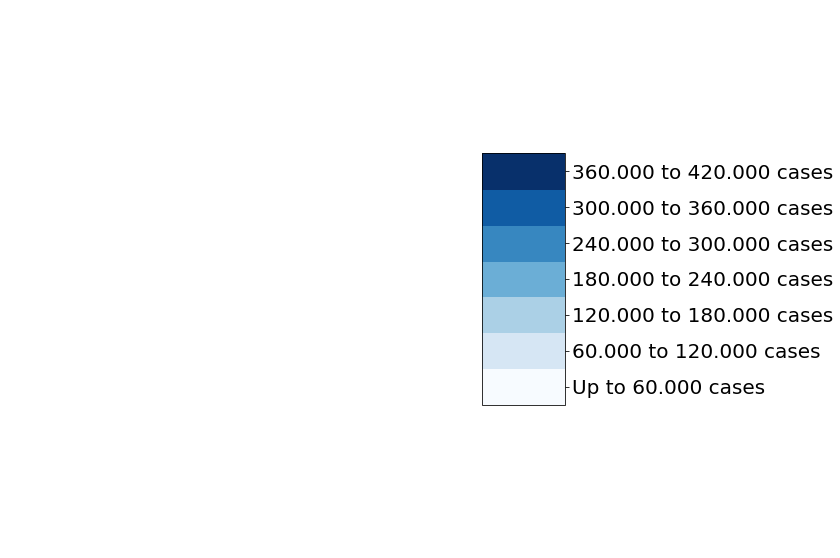

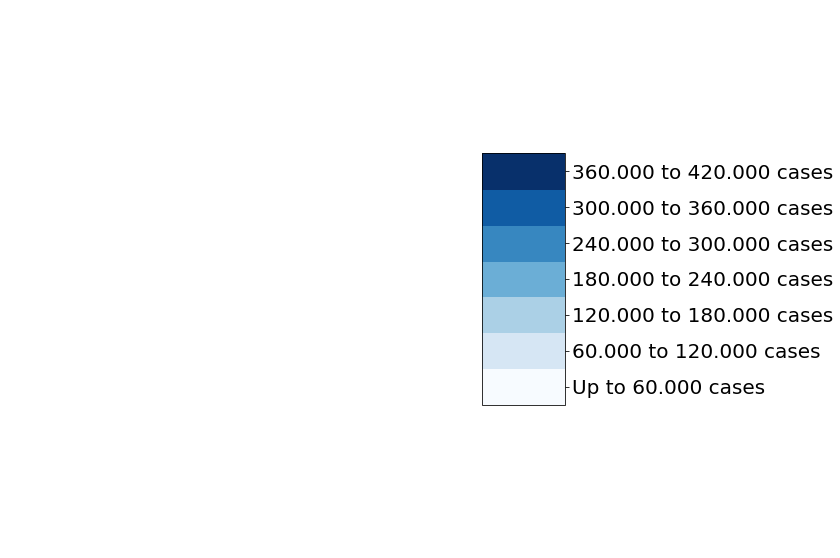

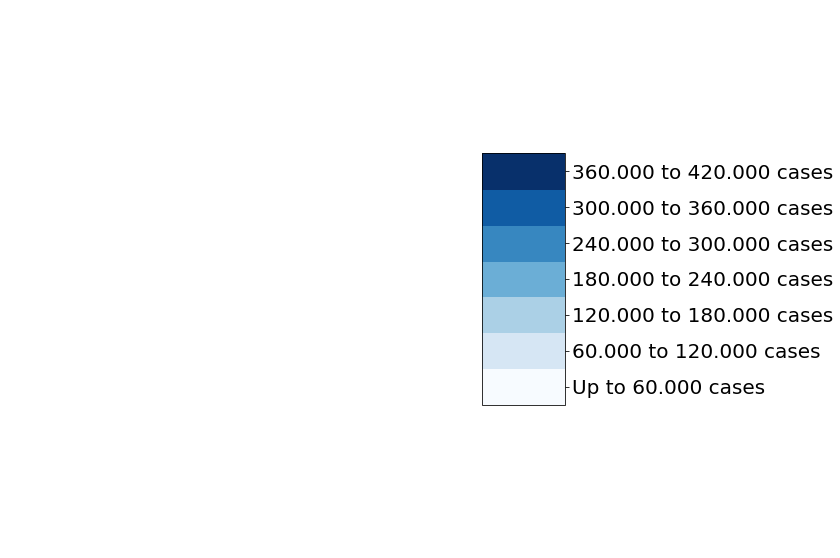

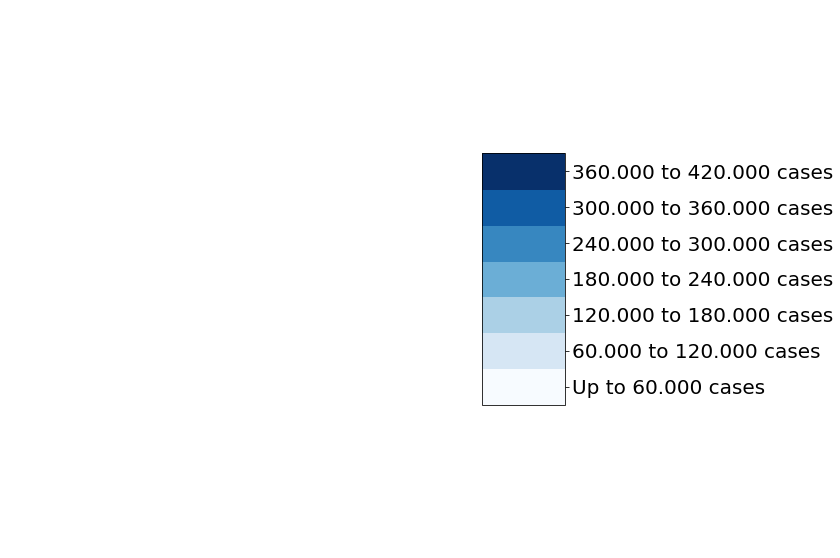

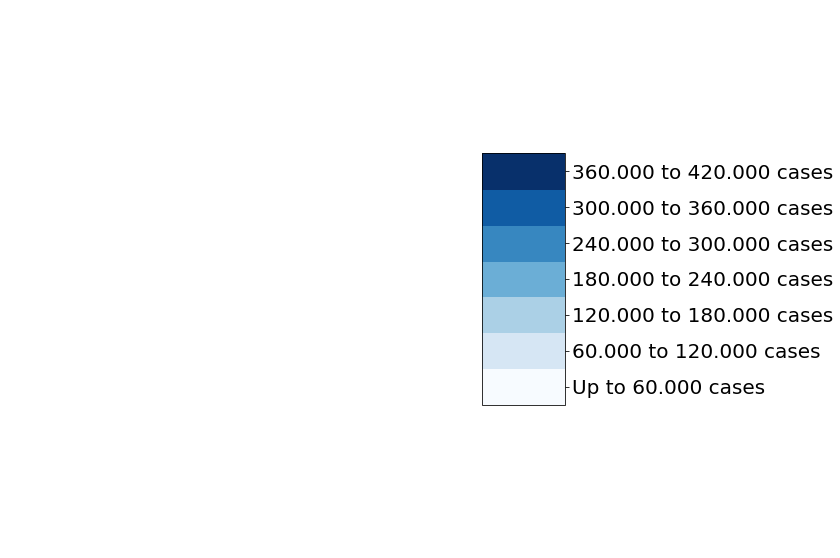

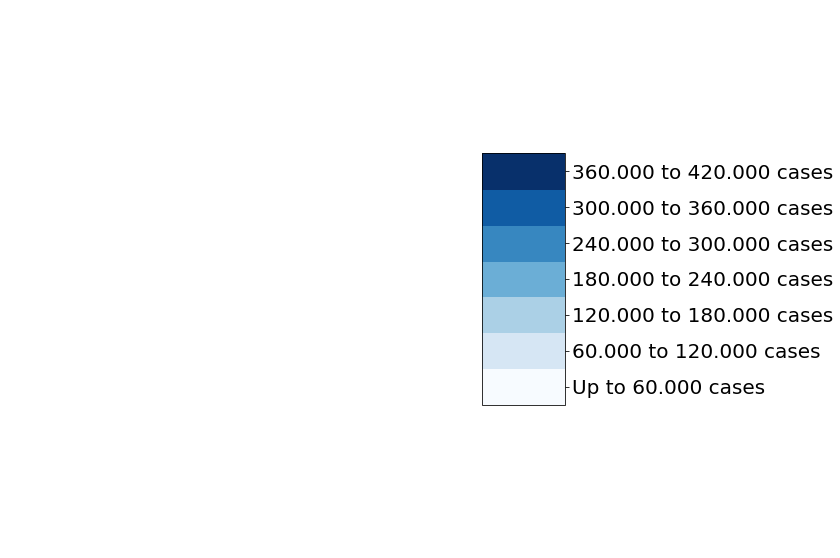

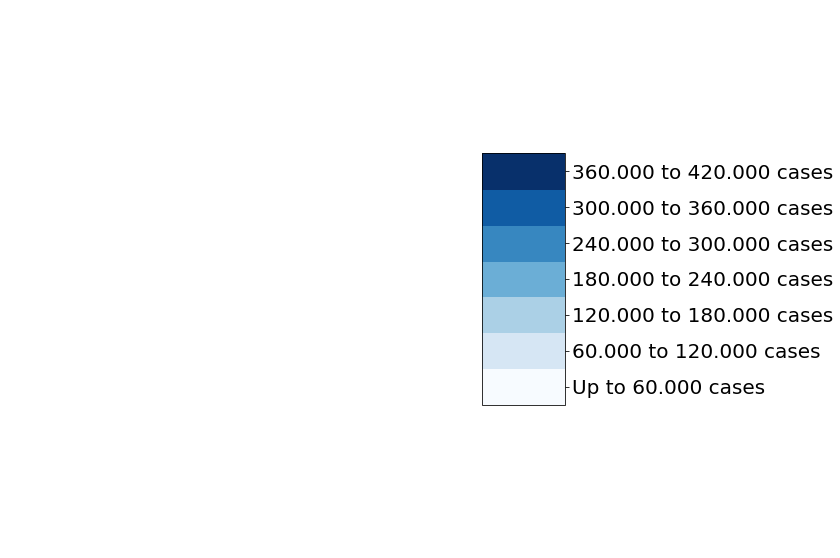

In [12]:
quant_blocos = 7
vmax = 420000

for ano in range(2013,2021) :
    plot_grafico_brasil(doenca='DENGUE', ano=ano, quant_blocos=quant_blocos, cor='Blues', path_save_folder="/home/ubuntu/Geracao_profiling/Mapas")

In [82]:
df.CHIKUNGUNYA.max()

73386

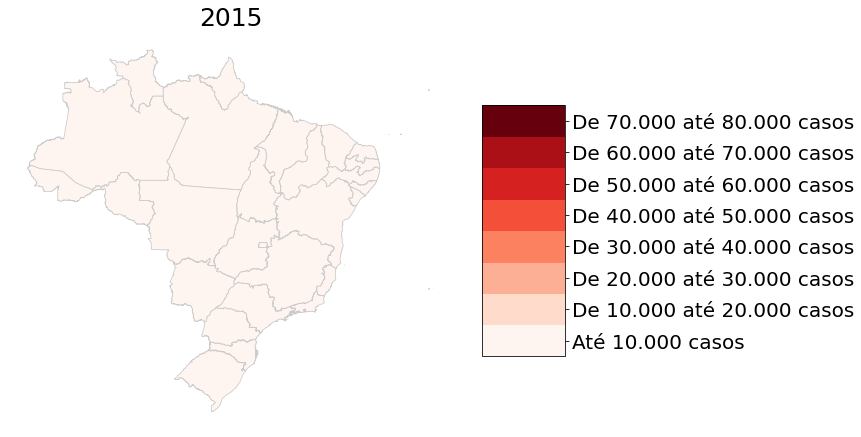

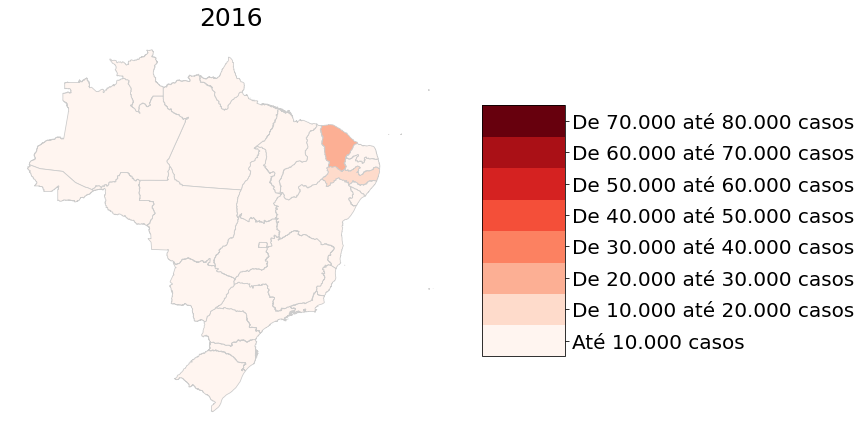

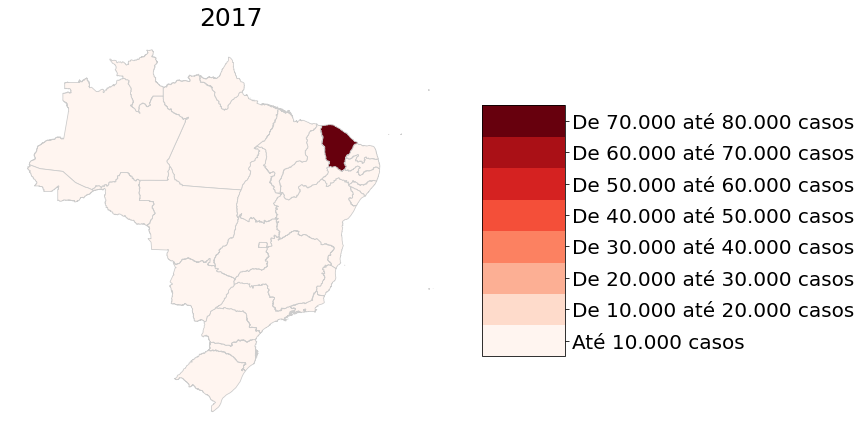

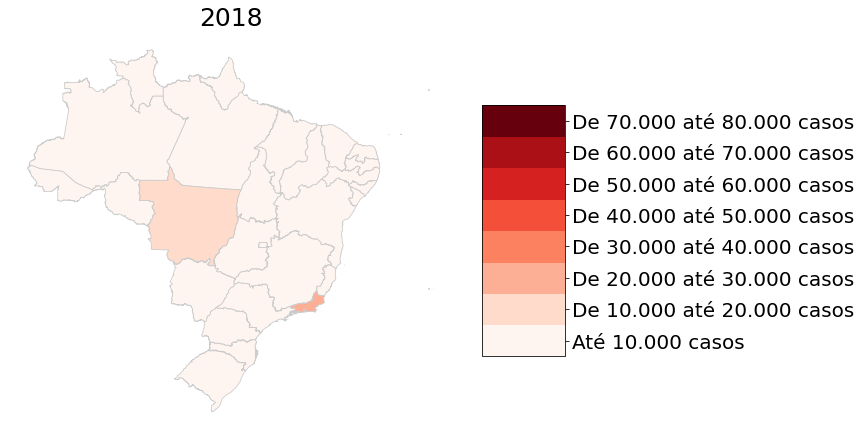

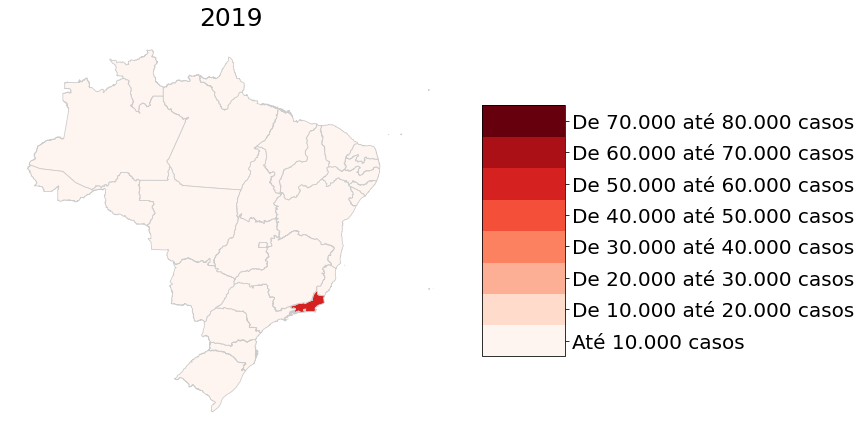

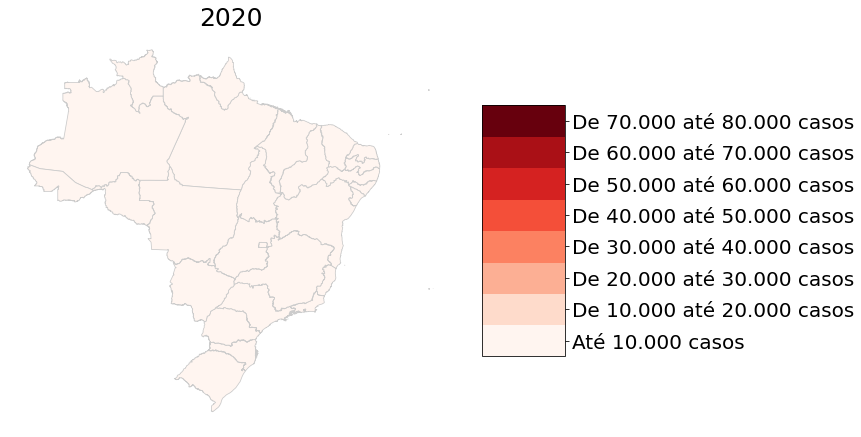

In [83]:
quant_blocos = 8
vmax = 80000

for ano in range(2015,2021) :
    plot_grafico_brasil(doenca='CHIKUNGUNYA', ano=ano, vmax=vmax, quant_blocos=quant_blocos, cor='Reds', path_save_folder="/home/ubuntu/Geracao_profiling/Mapas")

In [84]:
df[df.ANO == 2013]

,ANO,UF,DENGUE,CHIKUNGUNYA,OUTRAS_DOENCAS
0,2013,PB,6061,0,3455
1,2013,PE,3211,0,7890
2,2013,RN,7345,0,4281
3,2013,AC,766,0,2459
4,2013,RO,3419,0,2746
5,2013,ES,52114,0,9412
6,2013,GO,63062,0,15355
7,2013,MS,25912,0,12826
8,2013,PA,5922,0,5054
9,2013,AM,11491,0,3265


In [85]:
df.OUTRAS_DOENCAS.max()

117988

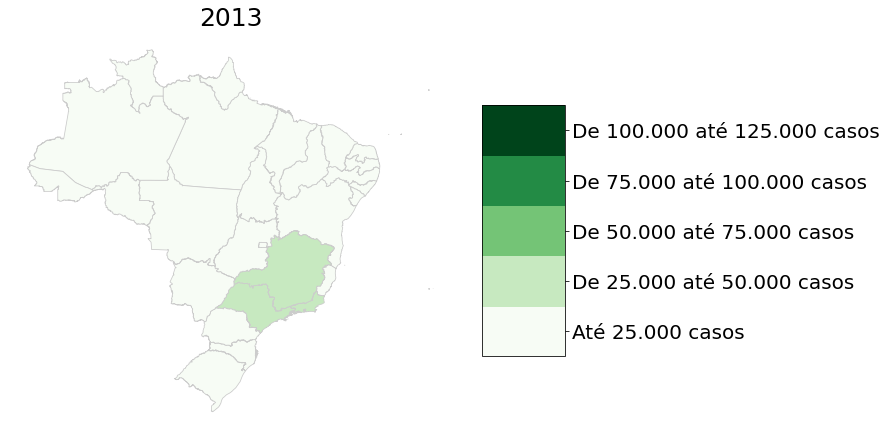

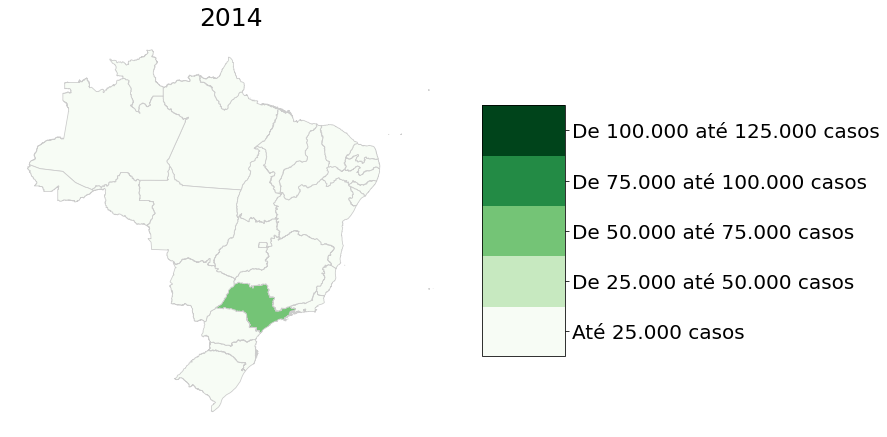

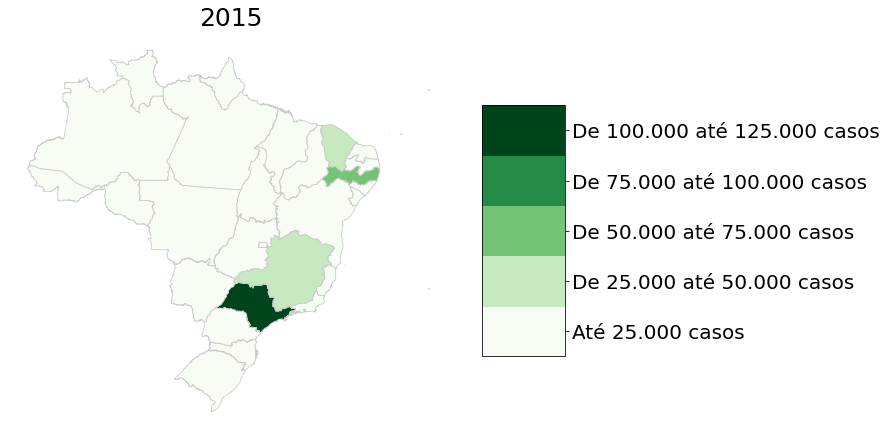

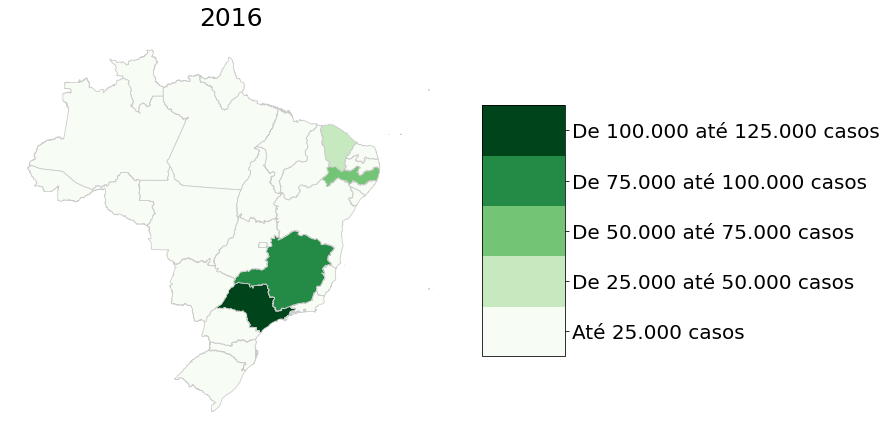

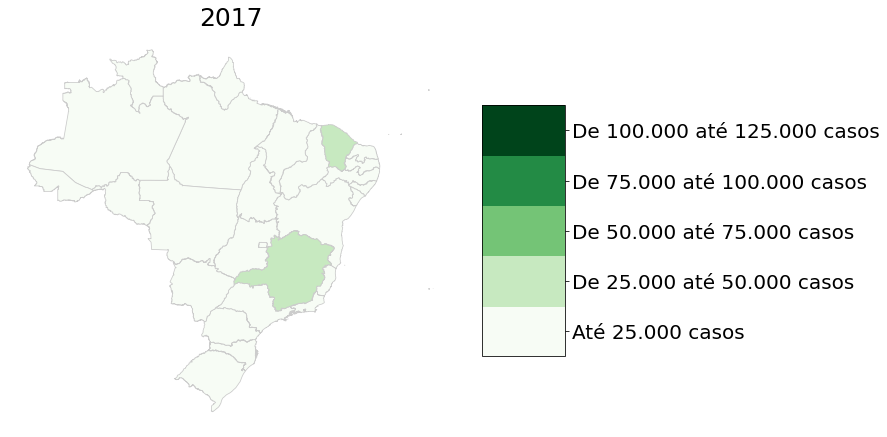

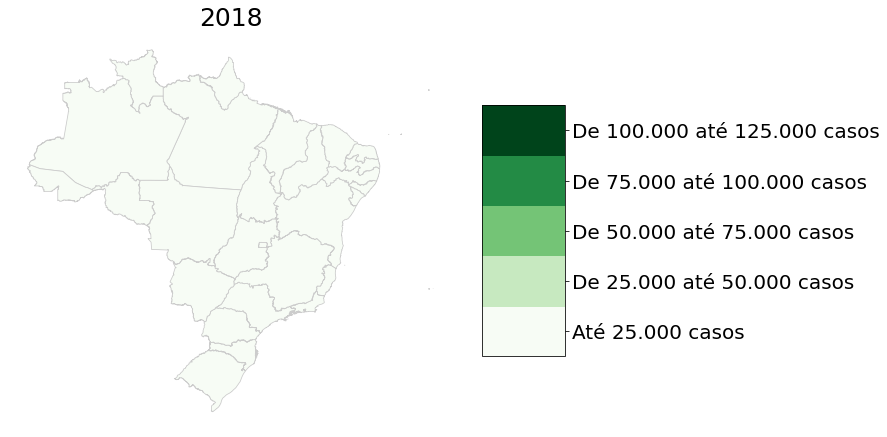

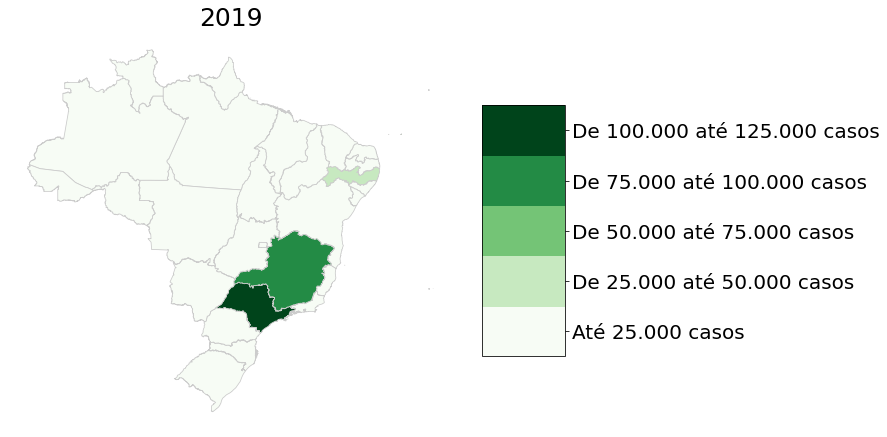

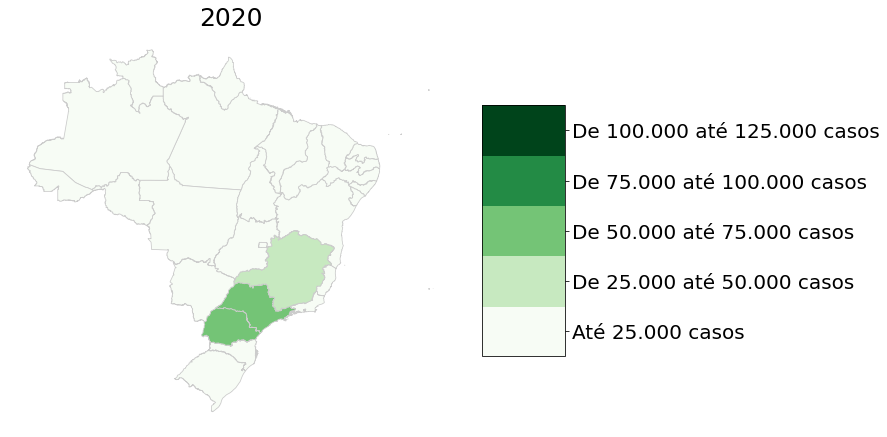

In [86]:
quant_blocos = 5
vmax = 125000

for ano in range(2013,2021) :
    plot_grafico_brasil(doenca='OUTRAS_DOENCAS', ano=ano, vmax=vmax, quant_blocos=quant_blocos, cor='Greens', path_save_folder="/home/ubuntu/Geracao_profiling/Mapas")